In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style = 'darkgrid')

! is a shell command

In [7]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [8]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


To check whether it is a categorical column or numerical column

In [11]:
df['type'].value_counts()

,count
type,
Movie,5377
TV Show,2410


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [13]:
#datatype conversion and adding missing values
#Filling them with unknown values
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [14]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [15]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [16]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [17]:
df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [18]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed', dayfirst = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


Creating new features for year added and month added

In [21]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


Q1. What is the distribution for content type?

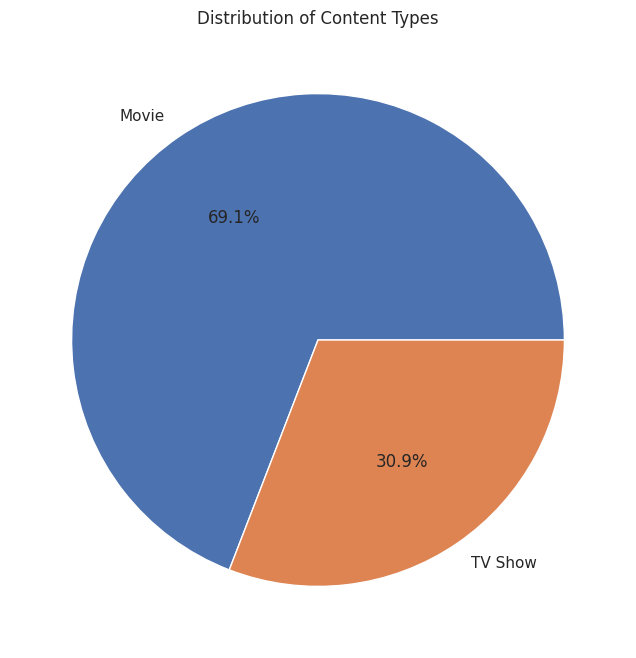

In [23]:
plt.figure(figsize = (10,8))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of Content Types')
plt.show()

Q2. How has the content been added over time?

<Axes: xlabel='year_added'>

<Figure size 1200x800 with 0 Axes>

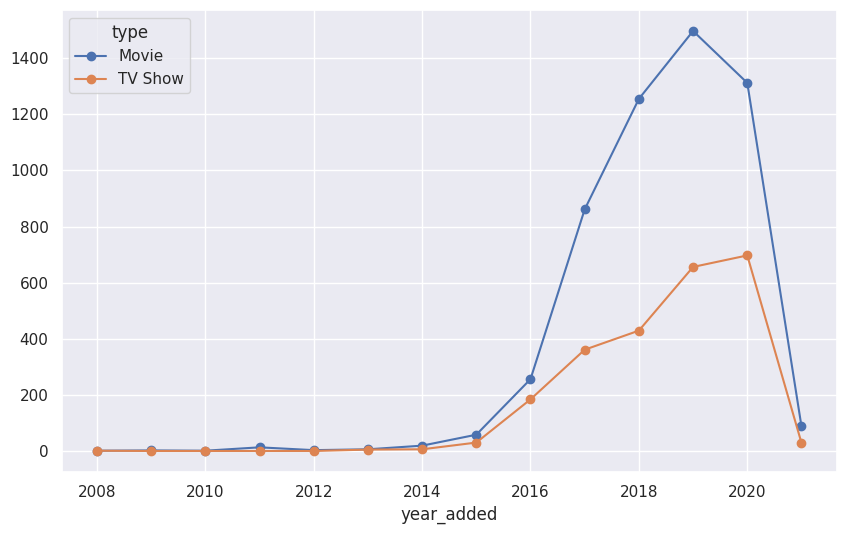

In [24]:
content_over_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
plt.figure(figsize = (12,8))
content_over_year.plot(kind = 'line', marker = 'o', figsize = (10,6))

Q3. What are the most popular genres?

In [25]:
#To handle multi-value text columns
genres = df.assign(genre = df['listed_in'].str.split(',')).explode('genre')

In [26]:
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['Genre', 'Count']

In [27]:
top_genres_counts.head(15)

,Genre,Count
0,International Movies,2323
1,Dramas,1383
2,Comedies,1074
3,Documentaries,751
4,Dramas,722
5,Action & Adventure,721
6,International TV Shows,689
7,Independent Movies,653
8,TV Dramas,641
9,Romantic Movies,528


Text(0, 0.5, 'Genre')

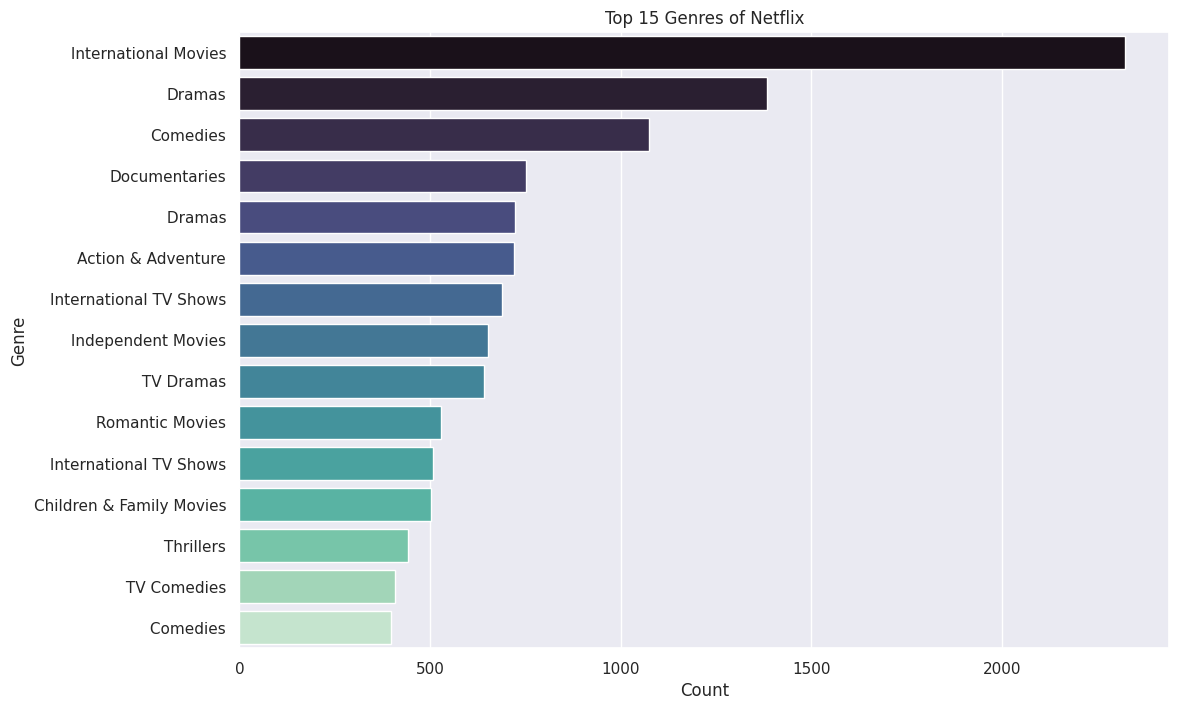

In [28]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Count', y = 'Genre', data = top_genres_counts.head(15), palette = 'mako', hue = 'Genre', legend = False)
plt.title('Top 15 Genres of Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

Q4. What is the distribution of content duration?

In [29]:
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [30]:
tv_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,8
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,11


In [31]:
movies_df['duration_mins'] = movies_df['duration'].str.replace(' min', '').astype(int)
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

<Axes: xlabel='seasons', ylabel='count'>

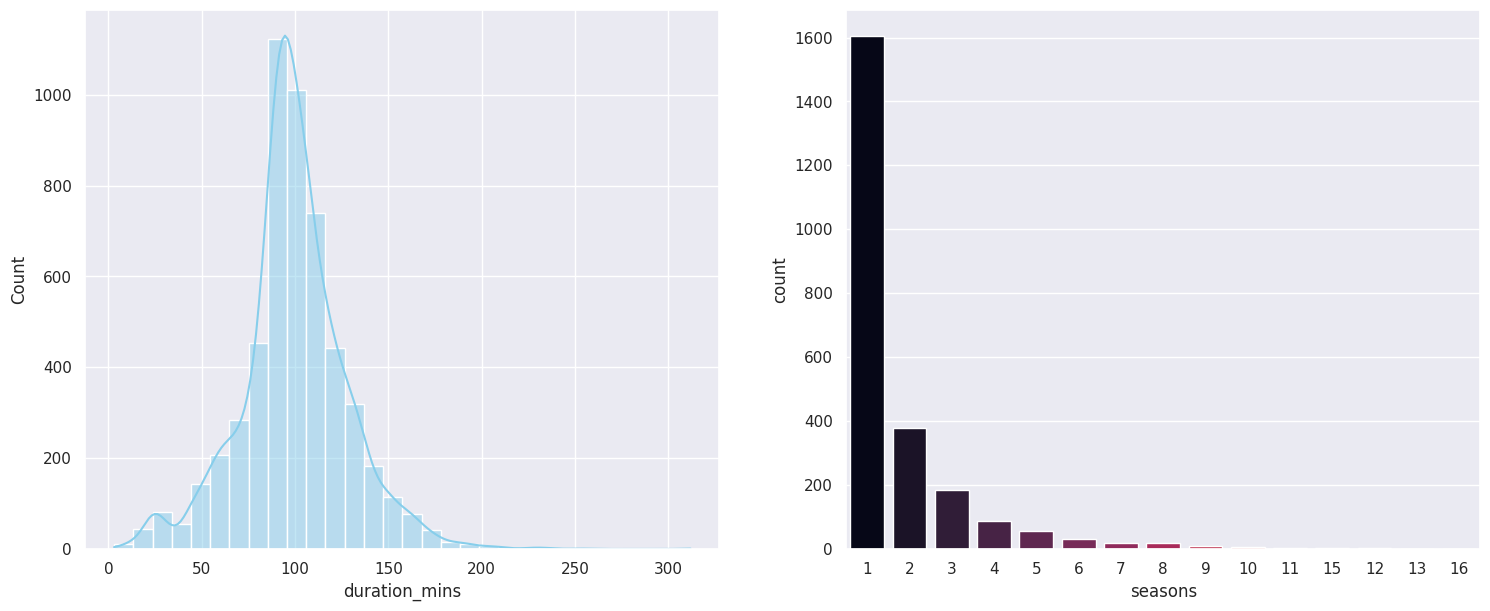

In [32]:
fig, axes = plt.subplots(1,2, figsize = (18,7))
sns.histplot(ax = axes[0], data = movies_df, x = 'duration_mins', bins = 30, kde = True, color = 'skyblue')
sns.countplot(ax = axes[1], x = 'seasons', data = tv_shows_df, palette = 'rocket', order=tv_shows_df['seasons'].value_counts().index, hue = 'seasons', legend = False)

Q5. Where does the content come from? (Geographical Analysis)

In [33]:
countries = df.assign(country = df['country'].str.split(',')).explode('country')

In [34]:
countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,United Kingdom,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,Canada,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3


In [35]:
countries['country'].value_counts().reset_index()
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['Country', 'Count']

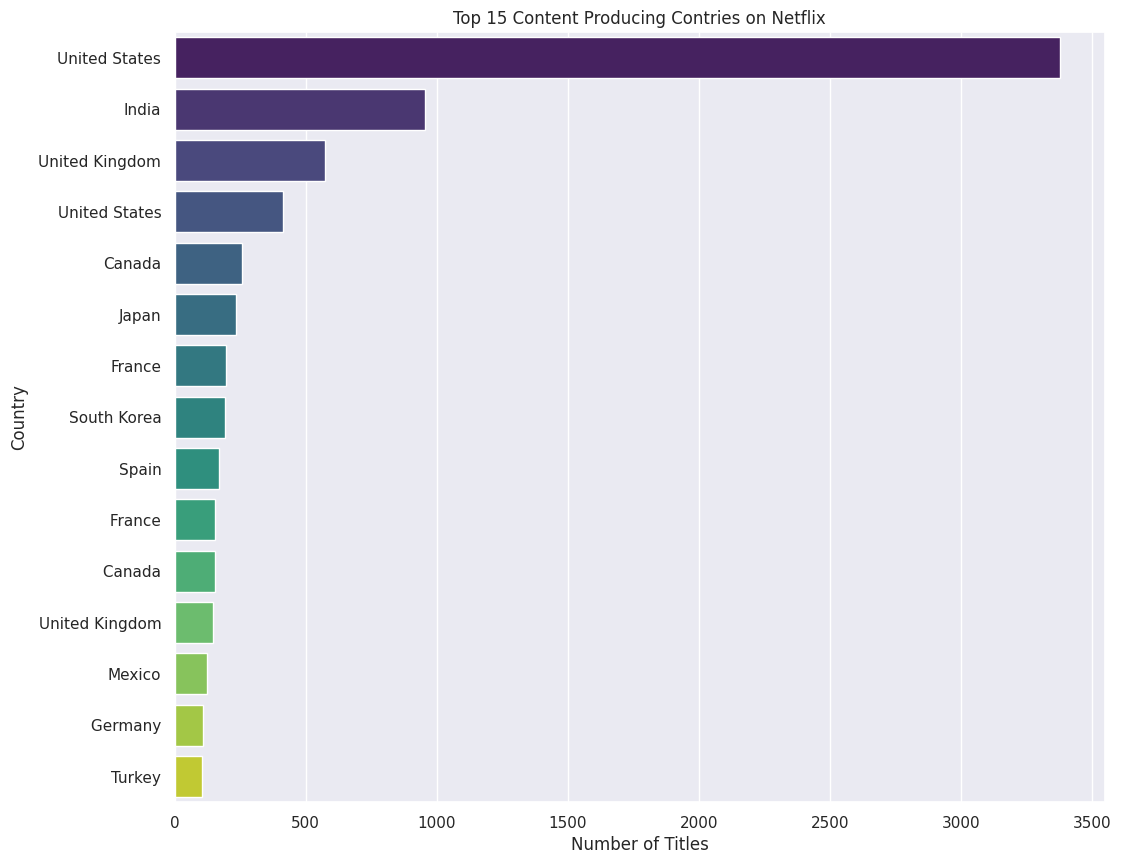

In [36]:
plt.figure(figsize = (12,10))
top_countries_counts_plot = top_countries_counts.head(15)
sns.barplot(x = 'Count', y = 'Country', data = top_countries_counts_plot, palette = 'viridis', hue = 'Country', legend = False)
plt.title('Top 15 Content Producing Contries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

Q6. What are the maturity ratings of the content?

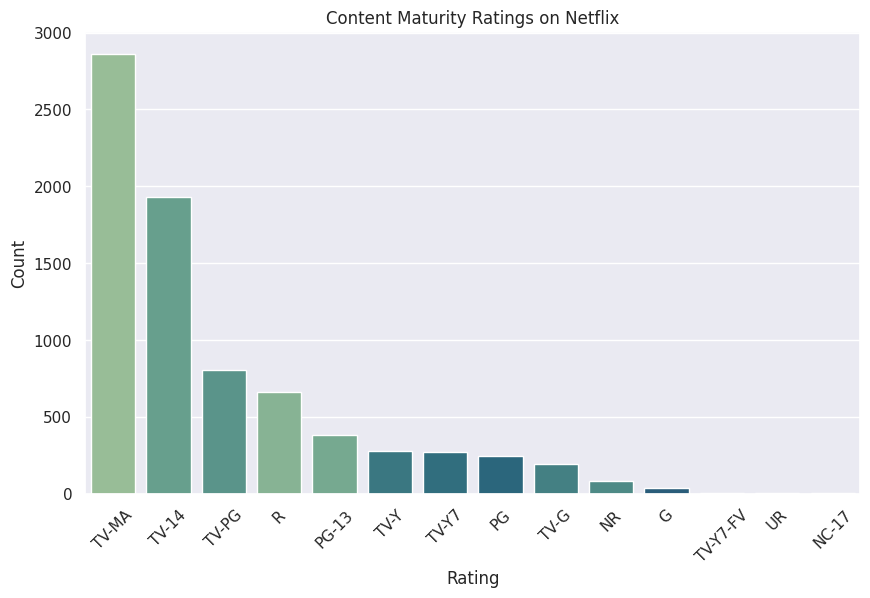

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'rating', data = df, palette = 'crest', order=df['rating'].value_counts().index, hue = 'rating', legend = False)
plt.xticks(rotation = 45)
plt.title('Content Maturity Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Feature Engineering: Content Freshness

In [38]:
df['age_on_netflix'] = df['year_added']-df['release_year']

In [39]:
content_age = df[df['age_on_netflix']>=0]

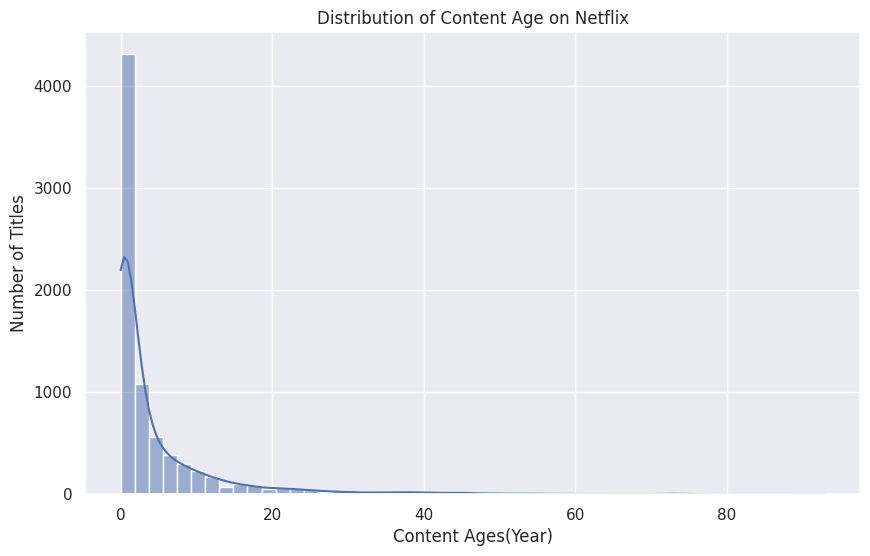

In [40]:
plt.figure(figsize = (10, 6))
sns.histplot(data = content_age, x = 'age_on_netflix', bins = 50, kde = True)
plt.title('Distribution of Content Age on Netflix')
plt.xlabel('Content Ages(Year)')
plt.ylabel('Number of Titles')
plt.show()

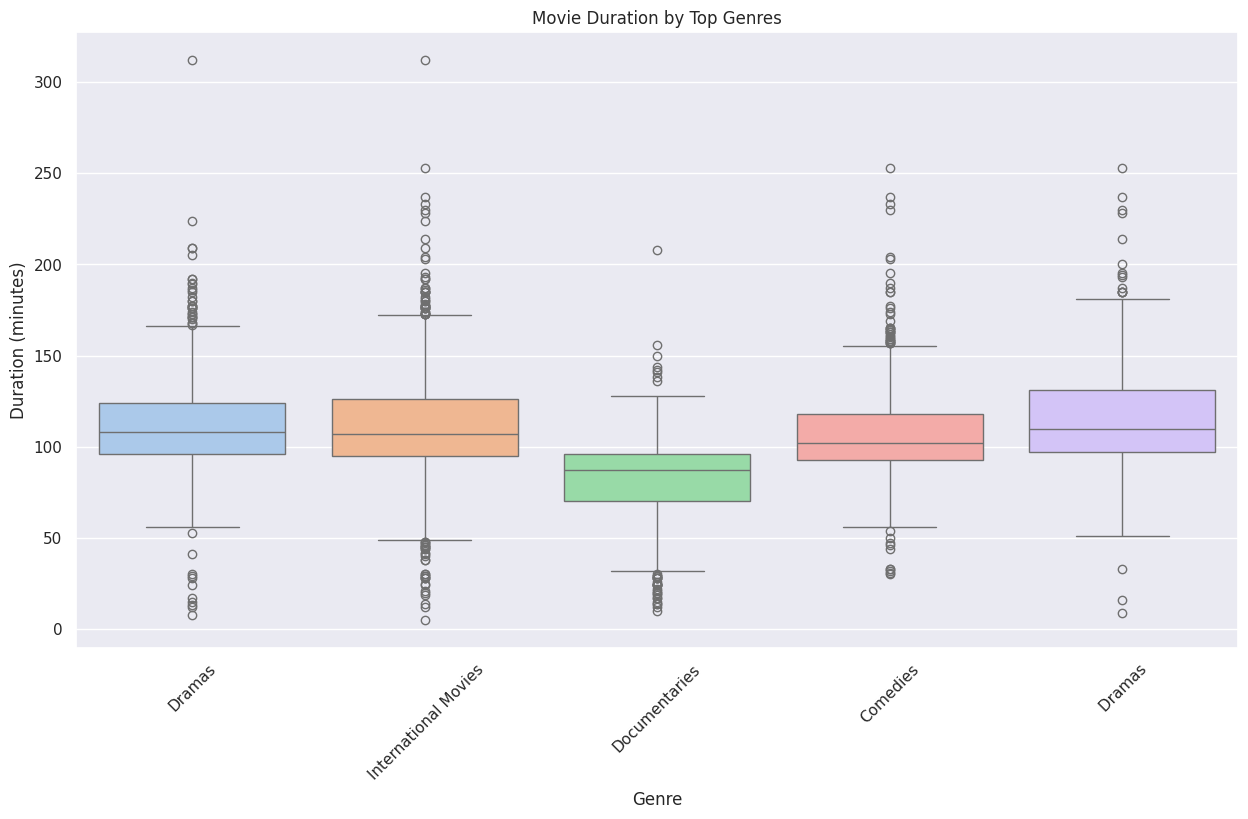

In [41]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

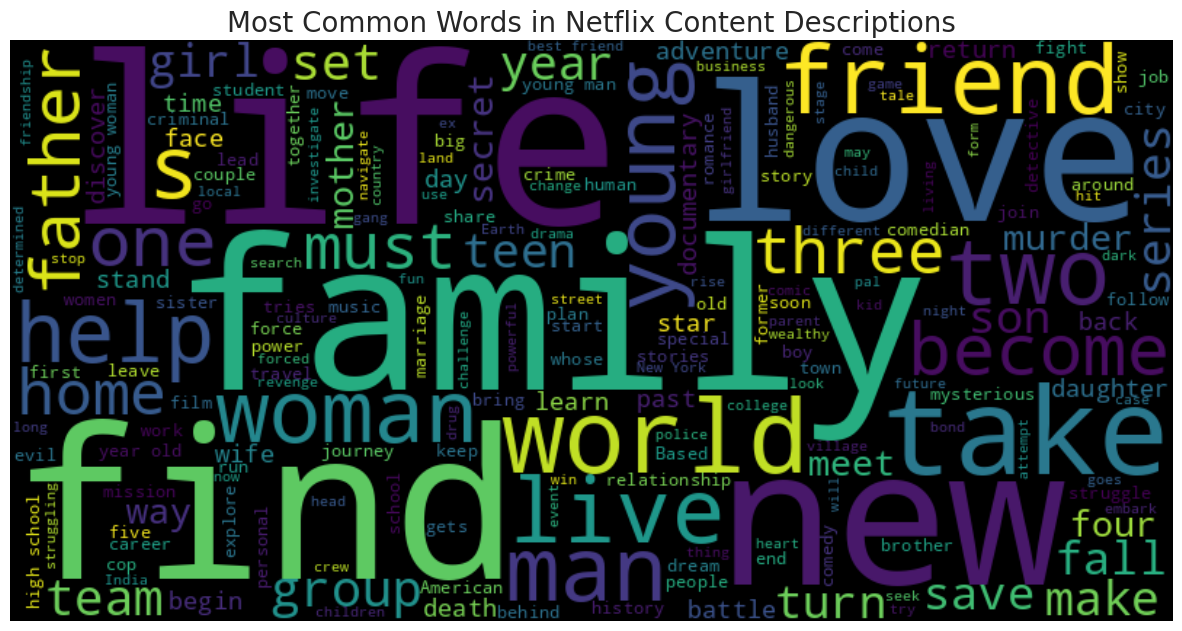

In [42]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

In [43]:
Q7. How has the distribution of content rating changed over time?

In [45]:
df['rating']

,rating
0,TV-MA
1,TV-MA
2,R
3,PG-13
4,PG-13
...,...
7782,TV-MA
7783,TV-14
7784,TV-MA
7785,TV-PG


<Axes: xlabel='year_added'>

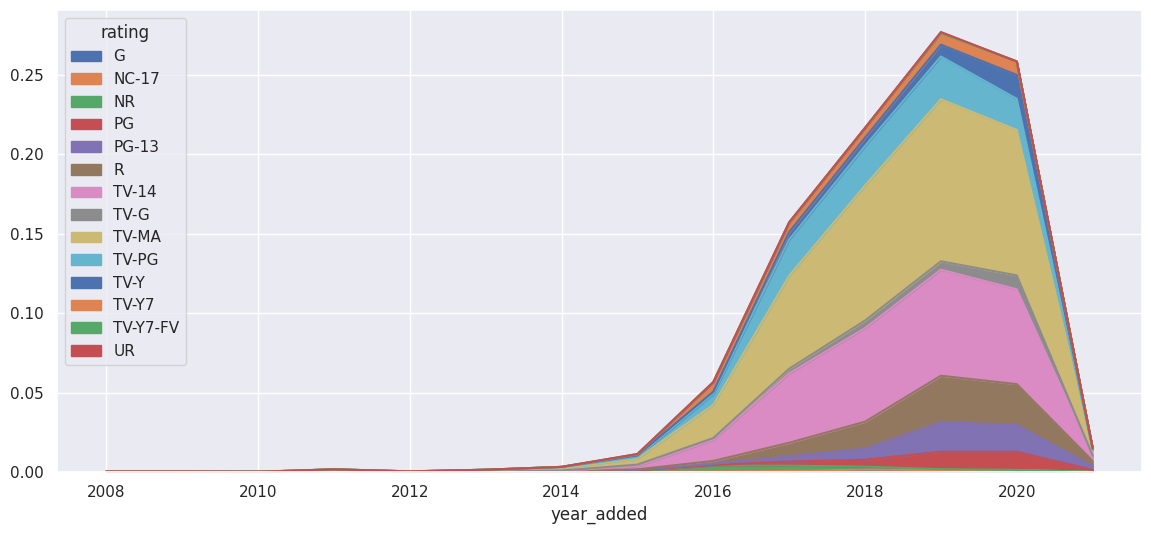

In [46]:
rating_year = (df[['year_added', 'rating']].value_counts(normalize=True).unstack())
rating_year.plot(kind='area', stacked=True, figsize=(14,6))


Q8. Is there a relationship between content age and its type (Movie vs. TV Show)?

In [48]:
df['content_age'] = df['year_added'] - df['release_year']

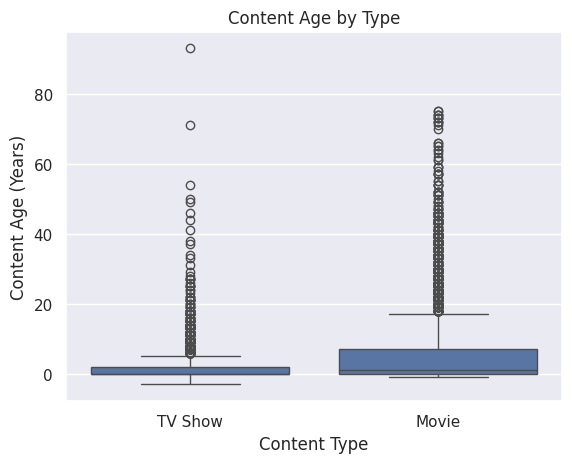

In [49]:
sns.boxplot(data=df, x='type', y='content_age')
plt.title("Content Age by Type")
plt.xlabel("Content Type")
plt.ylabel("Content Age (Years)")
plt.show()


Q9. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

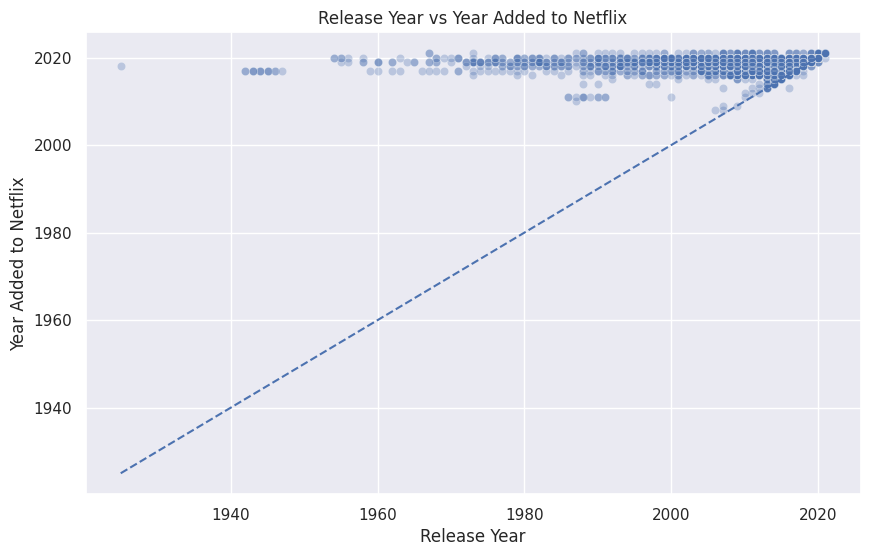

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='release_year', y='year_added', alpha=0.3)
plt.plot([df['release_year'].min(), df['release_year'].max()], [df['release_year'].min(), df['release_year'].max()], linestyle='--')
plt.title("Release Year vs Year Added to Netflix")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.show()


Q10. What are the most common word pairs or phrases in content descriptions?

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
X = vectorizer.fit_transform(df['description'].dropna())
bigram_counts = (pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False))
bigram_counts.head(10)


,0
high school,133
year old,130
young man,103
young woman,98
new york,86
small town,59
best friend,51
true story,48
stand special,47
world war,46


Q11. Who are the top directors on Netflix?

In [52]:
top_directors = (df[df['director'].notna()].assign(director=df['director'].str.split(', ')).explode('director').director.value_counts().head(10))


In [53]:
top_directors

,count
director,
Unknown,2376
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Martin Scorsese,12
Jay Chapman,12
